# Generating .npy Masks

### Code for converting the .csv segmentations labels to true masks

Citations: \
[1] https://www.kaggle.com/code/timetraveller98/creating-and-testing-fast-dataloaders \
[2] https://www.kaggle.com/code/timetraveller98/creating-and-testing-fast-dataloaders/notebook


In [1]:
# !pip install matplotlib
# !pip install opencv-python

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tqdm
import cv2



In [2]:
'''
Helper Functions!
'''
def get_img(image_path):
    """Load image from disk"""
    img = cv2.imread(image_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rle_decode(mask_rle: str = "", shape: tuple = (1400, 2100)):
    """Source: https://www.kaggle.com/artgor/segmentation-in-pytorch-using-convenient-tools"""
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order="F")


def make_mask(df: pd.DataFrame, image_name: str='img.jpg', shape: tuple = (1400, 2100)):
    """Source: https://www.kaggle.com/artgor/segmentation-in-pytorch-using-convenient-tools"""
    encoded_masks = df.loc[df['im_id'] == image_name, 'EncodedPixels']
    masks = np.zeros((shape[0], shape[1], 4), dtype=np.float32)
    for idx, label in enumerate(encoded_masks.values):
#         if label is not np.nan:
        print(len(encoded_masks.values))
        try:
            mask = rle_decode(label)
        except:
            mask = np.zeros((1400, 2100))
        masks[:, :, idx] = mask         
    return masks


# def get_img(name, image_dir='dir_op_npy', npy=False):
#     if npy:
#         return np.load(os.path.join(image_dir, name+'.npy'))
#     img = cv2.imread(os.path.join(image_dir, name))
#     return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        

def visualize(image, mask, original_image=None, original_mask=None, gray=True):
    """Source: https://www.kaggle.com/artgor/segmentation-in-pytorch-using-convenient-tools"""
    fontsize = 14
    class_dict = {0: "Fish", 1: "Flower", 2: "Gravel", 3: "Sugar"}    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 5, figsize=(24, 24))

        if gray:
            ax[0].imshow(image, cmap='gray')
        else:    
            ax[0].imshow(image)
        for i in range(4):
            ax[i + 1].imshow(mask[:, :, i])
            ax[i + 1].set_title(f"Mask {class_dict[i]}", fontsize=fontsize)
    else:
        f, ax = plt.subplots(2, 5, figsize=(24, 12))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title("Original image", fontsize=fontsize)

        for i in range(4):
            ax[0, i + 1].imshow(original_mask[:, :, i])
            ax[0, i + 1].set_title(f"Original mask {class_dict[i]}", fontsize=fontsize)

        ax[1, 0].imshow(image)
        ax[1, 0].set_title("Transformed image", fontsize=fontsize)

        for i in range(4):
            ax[1, i + 1].imshow(mask[:, :, i])
            ax[1, i + 1].set_title(
                f"Transformed mask {class_dict[i]}", fontsize=fontsize
            )


In [3]:
'''
Generate some masks
'''
# !pwd understanding_cloud_organization

#Load train.csv to make mask
train = pd.read_csv(f"understanding_cloud_organization/train.csv")
train["label"] = train["Image_Label"].apply(lambda x: x.split("_")[1])
train["im_id"] = train["Image_Label"].apply(lambda x: x.split("_")[0])


N = 1000 #number of images
dir_ip = '/home/Munachiso.Nwadike/tuunv2/pipelines/cloud-segmentation-pipeline/datasets/understanding_cloud_organization/train_images'
dir_op_mask = '/home/Munachiso.Nwadike/tuunv2/pipelines/cloud-segmentation-pipeline/datasets/understanding_cloud_organization/train_masks'


try:
    os.mkdir(dir_op_mask)
except OSError as error: # if it already exists?
    print(error) 
    
    
bar = tqdm.tqdm(os.listdir(dir_ip), postfix={"file":"none"})
for file in bar:
    bar.set_postfix(ordered_dict={"file":file})    
#     path = os.path.join(dir_ip, file)
    mask = make_mask(train, file) 
    file = file + '.npy'
    print(mask.shape)
    np.save(os.path.join(dir_op_mask, file), mask)
    break
#     try:
#         np.save(os.path.join(dir_op_mask, file), mask)
#     except:
#         print("Error Encountered @",file)
#         break

[Errno 17] File exists: '/home/Munachiso.Nwadike/tuunv2/pipelines/cloud-segmentation-pipeline/datasets/understanding_cloud_organization/train_masks'


  0%|                                                                | 0/5546 [00:00<?, ?it/s, file=10ed865.jpg]

4
4
4
4
(1400, 2100, 4)


/home/Munachiso.Nwadike/tuunv2/pipelines/cloud-segmentation-pipeline/datasets/understanding_cloud_organization/train_images/10ed865.jpg
(1400, 2100, 4)


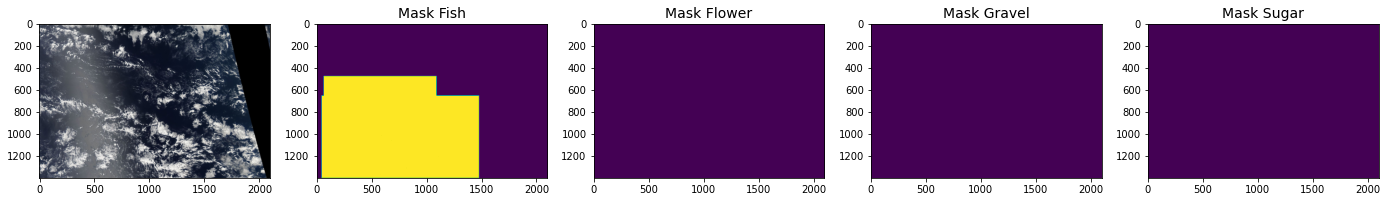

In [5]:
'''
Visualise mask!
'''

# !ls understanding_cloud_organization/train_masks

# for batch in os.listdir(dir_ip):
for batch in ['10ed865.jpg']:
    print(os.path.join(dir_ip, batch))
    images = get_img(os.path.join(dir_ip, batch))
    # cv2.imshow("name", images)
    masks = np.load(os.path.join(dir_op_mask, batch+'.npy'))#print(batch)
    print(masks.shape)
    visualize(images, masks)
    break        